<h2>
  Preprocesamiento (al menos una valida, otros dos por ver los resultados, si no se aplica justifique porque), Balanceo de datos
</h2>
<p>
Se puede aplicar el balanceo de datos aquí? No, porque el target (la variable dependiente, como el precio) es continua. SMOTE y otras técnicas de balanceo de clases se usan en problemas donde las clases son discretas (por ejemplo, "sí" o "no", "compra" o "no compra"), pero en este caso no tiene sentido aplicar un balanceo en un problema de regresión.
</p>

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Cargar los datos
data = pd.read_csv('/content/drive/My Drive/datasets/laptop_prices.csv')

# Crear DataFrame
df = pd.DataFrame(data)

# print(tabulate(df.head(10), headers='keys', tablefmt='grid'))
# # Verificar valores faltantes
# print("\nValores faltantes por columna:")
# print(df.isnull().sum())
# # Verificar duplicados
# print("\nNúmero de filas duplicadas:")
# print(df.duplicated().sum())
# LIMPIEZA DE DATOS
# a) Eliminar valores faltantes
df_cleaned = df.dropna()
# b) Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates()
# CONVERSIÓN DE VARIABLES CATEGÓRICAS
label_encoder = LabelEncoder()

# Convertir columnas categóricas a numéricas (identificar columnas categóricas primero)
categorical_columns = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
                       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
                       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model','Ram']

for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# print("\nDataFrame después de codificar variables categóricas:")
# print(tabulate(df_cleaned.head(10), headers='keys', tablefmt='grid'))

# NORMALIZACIÓN DE DATOS NUMÉRICOS
scaler = StandardScaler()

# Identificar columnas numéricas
numeric_columns = ['Inches', 'Weight', 'Price_euros', 'ScreenW',
                   'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

# Normalizar las columnas numéricas
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

print("\nDataFrame después de normalización:")
print(tabulate(df_cleaned.head(10), headers='keys', tablefmt='grid'))



DataFrame después de normalización:
+----+-----------+-----------+------------+-----------+-------+------+-------------+---------------+----------+------------+-----------+---------------+------------+-----------------+---------------+-------------+-------------+------------------+--------------------+----------------------+------------------------+---------------+-------------+
|    |   Company |   Product |   TypeName |    Inches |   Ram |   OS |      Weight |   Price_euros |   Screen |    ScreenW |   ScreenH |   Touchscreen |   IPSpanel |   RetinaDisplay |   CPU_company |    CPU_freq |   CPU_model |   PrimaryStorage |   SecondaryStorage |   PrimaryStorageType |   SecondaryStorageType |   GPU_company |   GPU_model |
+====+===========+===========+============+===========+=======+======+=============+===============+==========+============+===========+===============+============+=================+===============+=============+=============+==================+====================+====

 **Balanceo de datos**
 El balanceo es importante cuando las clases están desbalanceadas, es decir, si algunas clases tienen muchos más ejemplos que otras.
 Identificar el desbalance
- Inspeccionamos la distribución de las clases en el conjunto de entrenamiento.
- Usaremos SMOTE para generar ejemplos sintéticos para las clases minoritarias.

 SMOTE es una técnica que se utiliza para aumentar el número de muestras de las clases minoritarias generando muestras sintéticas (no copias exactas) en lugar de simplemente duplicar los ejemplos de las clases minoritarias

 **Inspeccionar la distribución original de las clases
SMOTE no es adecuado para problemas de regresión porque está diseñado para generar muestras
sintéticas de clases minoritarias en problemas de clasificación.**

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Preparar las variables de entrada (X) y objetivo (y)
# X = df_cleaned.drop(columns=['Price_euros'])  # Variables de entrada
# y = df_cleaned['Price_euros']  # Variable objetivo

# # Dividir datos en conjunto de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# print("\nDistribución de clases en y_train antes de SMOTE:")
# print(Counter(y_train))
# Inspeccionar la distribución original de las clases
# SMOTE no es adecuado para problemas de regresión porque está diseñado para generar muestras
# sintéticas de clases minoritarias en problemas de clasificación.

# Aplicar SMOTE para balancear las clases
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Inspeccionar la distribución después de SMOTE
# print("\nDistribución de clases en y_train después de SMOTE:")
# print(Counter(y_resampled), headers='keys', tablefmt='grid')



**Primera ejecución:


El SVR tiene varios hiperparámetros que afectan su rendimiento. Un ajuste fino de estos parámetros puede mejorar los resultados. Por ejemplo, puedes probar diferentes valores para C, epsilon, y gamma.

- C: Controla el margen de error permitido. Un valor mayor de C reduce el margen de error, pero puede sobreajustar.
- Gamma: Controla la influencia de cada punto de datos. Un valor bajo de gamma implica que los puntos lejanos tienen más influencia.
- Epsilon: Define el margen de tolerancia en el que no se penalizan los errores.

In [ ]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_cleaned.drop('Price_euros', axis=1)  # Características
y = df_cleaned['Price_euros']  # Etiqueta
def entrenando (X,y,pertest):

  # División de los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pertest, random_state=42)

  # Entrenamiento del modelo SVR
  svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Usamos el kernel radial (RBF) rbf, poly, linear
  svr.fit(X_train, y_train)


  y_pred = svr.predict(X_test)

  # Evaluación de las métricas
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Mostrar las métricas
  print(f"Mean Absolute Error: {mae}") #La diferencia promedio entre lo que tu modelo predice y lo que realmente sucedió
  print(f"Mean Squared Error: {mse}") #significa que los errores grandes tienen un impacto mucho mayor en el MSE que los errores pequeños
  print(f"Root Mean Squared Error: {rmse}") #devuelve el RMSE a las mismas unidades que los datos originales, lo que lo hace más fácil de interpretar
  print(f"R^2 Score: {r2}") #Mide qué tan bien tu modelo se ajusta a los datos en general.
  return svr,r2

print("\n80 , 20")
svr1,r2_1=entrenando(X,y,0.2)
print("\n50 , 50")
svr2,r2_2=entrenando(X,y,0.5)
print("\n70 , 30")
svr1,r2_1=entrenando(X,y,0.27)



80 , 20
Mean Absolute Error: 0.5524821562414617
Mean Squared Error: 0.6902835888173524
Root Mean Squared Error: 0.8308330691645298
R^2 Score: 0.20335329802937707

50 , 50
Mean Absolute Error: 0.5764421852386021
Mean Squared Error: 0.7426670857392482
Root Mean Squared Error: 0.8617813445063941
R^2 Score: 0.18772904910725607

70 , 30
Mean Absolute Error: 0.5367796215252625
Mean Squared Error: 0.6323350598562489
Root Mean Squared Error: 0.7951949822881486
R^2 Score: 0.2353232362992993


Error Absoluto Medio (MAE - Mean Absolute Error)
Mide la magnitud promedio de los errores entre las predicciones del modelo y los valores reales, sin tener en cuenta la dirección (es decir, si el error es positivo o negativo).
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$


Error Cuadrático Medio (MSE - Mean Squared Error)
Mide el promedio de los errores al cuadrarlos. A diferencia del MAE, da más peso a los errores grandes, lo que puede ser útil si quieres penalizar más las predicciones incorrectas.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)
Es la raíz cuadrada del MSE. Esto lo convierte en una métrica que tiene las mismas unidades que las variables que estamos midiendo (por ejemplo, si estás prediciendo precios en euros, el RMSE estará en euros).



$$
RMSE = \sqrt{MSE}
$$
R^2 (Coeficiente de Determinación)
Mide la proporción de la varianza de la variable dependiente que es explicada por el modelo. Va de 0 a 1 (aunque también puede ser negativo si el modelo no explica nada).

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos en características y etiquetas
X = df_cleaned.drop('Price_euros', axis=1)  # Características
y = df_cleaned['Price_euros']  # Etiqueta

def entrenando(X, y, pertest, imprimo=1):
    # División de los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pertest, random_state=42)

    # Entrenamiento del modelo Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators y otros parámetros
    rf.fit(X_train, y_train)

    # Predicciones
    y_pred = rf.predict(X_test)

    # Evaluación de las métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    if imprimo:
      # Mostrar las métricas
      print(f"Mean Absolute Error: {mae}")  # La diferencia promedio entre lo que tu modelo predice y lo que realmente sucedió
      print(f"Mean Squared Error: {mse}")  # Significa que los errores grandes tienen un impacto mucho mayor en el MSE que los errores pequeños
      print(f"Root Mean Squared Error: {rmse}")  # Devuelve el RMSE a las mismas unidades que los datos originales, lo que lo hace más fácil de interpretar
      print(f"R^2 Score: {r2}")  # Mide qué tan bien tu modelo se ajusta a los datos en general

    return rf, r2

# Ejecución con diferentes divisiones de los datos

print("\n80 , 20")
rf1, r2_1 = entrenando(X, y, 0.2)

print("\n50 , 50")
rf2, r2_2 = entrenando(X, y, 0.5)

print("\n70 , 30")
rf3, r2_3 = entrenando(X, y, 0.3)



80 , 20
Mean Absolute Error: 0.2172103552259655
Mean Squared Error: 0.10182570269554542
Root Mean Squared Error: 0.31910139876776694
R^2 Score: 0.8824843708551336

50 , 50
Mean Absolute Error: 0.2579248631211916
Mean Squared Error: 0.16055655977092265
Root Mean Squared Error: 0.40069509576599843
R^2 Score: 0.8243958403685281

70 , 30
Mean Absolute Error: 0.2352006053269923
Mean Squared Error: 0.12305868762639616
Root Mean Squared Error: 0.35079721724437346
R^2 Score: 0.8491795869126976


In [ ]:
# Ejecutar 100 splits y calcular la mediana de la confiabilidad
r2_scores = []
a=0.001
for _ in range(100):
    model, r2_score_split = entrenando(X, y, 0.2+a,0)  # 80% entrenamiento, 20% prueba
    r2_scores.append(r2_score_split)
    a=a+0.001

# Calcular la mediana de R^2
print(r2_scores)
mediana_r2 = np.median(r2_scores)

print(f"Mediana de R^2 después de 100 splits: {mediana_r2}")

[0.8847308084304705, 0.8864363700997601, 0.8913261020313923, 0.8881615954798793, 0.8884575794433223, 0.8856073447448002, 0.886819909244708, 0.8888769536237856, 0.8899413995344548, 0.883227814436669, 0.8809731464674981, 0.8735602655373873, 0.8782910317067355, 0.8808168394169412, 0.8884580224788525, 0.8840022650018062, 0.8793780447425771, 0.8872728089300282, 0.8875534114207096, 0.8869662946644342, 0.8829276962344145, 0.8835646121571838, 0.8905149591621463, 0.8887330351587542, 0.8841011154826423, 0.8867638756199266, 0.8880134293694111, 0.8877919117032498, 0.883139106672407, 0.8926706412714145, 0.886295290516716, 0.8838554880586533, 0.881928052902093, 0.8867496744187313, 0.8886071290622034, 0.8822315556270459, 0.8829655159607555, 0.8872798171601258, 0.8869786247741819, 0.8853480184508964, 0.8879584243058737, 0.8795307554979787, 0.883295079129184, 0.881106093990714, 0.8878019372920217, 0.8876193950517371, 0.8855417564240164, 0.8825067705598293, 0.8823256825866347, 0.8813340285515416, 0.8875

PCA
- Cálculo de la matriz de covarianza:
La matriz de covarianza describe cómo varían las características entre sí. Si tienes un conjunto de datos de varias dimensiones, PCA examina las relaciones de covarianza entre ellas.

- Cálculo de autovalores y autovectores:
Los autovalores y autovectores de la matriz de covarianza son fundamentales para identificar las direcciones en las que los datos tienen mayor varianza. Los autovalores indican la cantidad de varianza que captura cada componente principal, y los autovectores representan la dirección de los componentes principales.

- Transformación de los datos:
Una vez que tienes los autovectores, puedes proyectar los datos originales en el espacio de los componentes principales para reducir las dimensiones manteniendo la mayor parte de la varianza posible.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def pca_entrenando(X, y, n_components, pertest):
    # División de los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pertest, random_state=42)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Entrenar el modelo Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train_pca, y_train)

    # Predicciones
    y_pred = rf.predict(X_test_pca)

    # Evaluación de las métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Mostrar las métricas
    # print(f"Mean Absolute Error (MAE): {mae}")
    # print(f"Mean Squared Error (MSE): {mse}")
    # print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")

    return pca, rf, r2


# Entrenar y evaluar con diferentes cantidades de componentes principales
componentes = [12, 10, 11, 9, 5, 3]

for n in componentes:
    print(f"\nEjecutando PCA con {n} componentes principales:")
    pca, rf, r2 = pca_entrenando(X, y, n_components=n, pertest=0.2)




Ejecutando PCA con 12 componentes principales:
R^2 Score: 0.8247465718126334

Ejecutando PCA con 10 componentes principales:
R^2 Score: 0.8143413515346579

Ejecutando PCA con 11 componentes principales:
R^2 Score: 0.818698545365486

Ejecutando PCA con 9 componentes principales:
R^2 Score: 0.8231646866838299

Ejecutando PCA con 5 componentes principales:
R^2 Score: 0.7916057330793461

Ejecutando PCA con 3 componentes principales:
R^2 Score: 0.7730243495478559


Sin tomar en cuenta “y” o la el class, realice un proceso de aprendizaje no supervisado de su dataset

<h2>
 Reducción de Dimensionalidad con PCA
</h2>



Varianza explicada por los 2 primeros componentes:  [0.96641805 0.02333116]
Varianza explicada por los 3 primeros componentes:  [0.96641805 0.02333116 0.00919917]


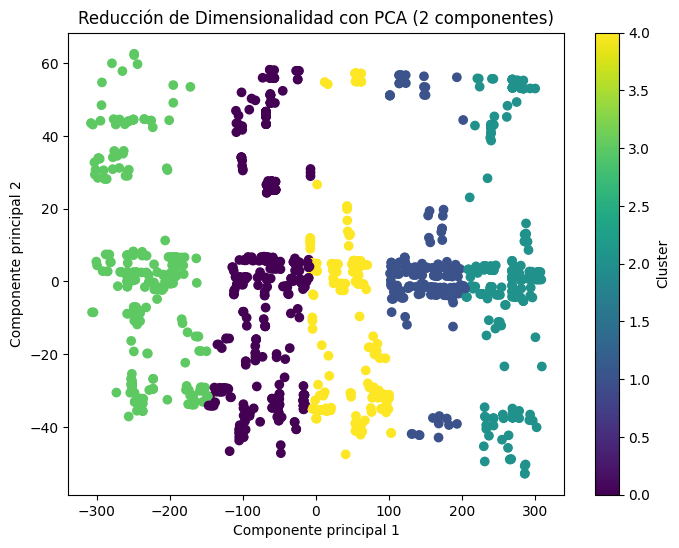

In [ ]:
from sklearn.decomposition import PCA

# Seleccionar características del dataset (sin Price_euros)
X_pca = df_cleaned.drop('Price_euros', axis=1)

# Aplicar PCA con diferentes números de componentes
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_pca)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_pca)

# Ver la varianza explicada por cada componente
print("Varianza explicada por los 2 primeros componentes: ", pca_2.explained_variance_ratio_)
print("Varianza explicada por los 3 primeros componentes: ", pca_3.explained_variance_ratio_)

# Graficar los resultados (para 2 componentes)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title("Reducción de Dimensionalidad con PCA (2 componentes)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()


<h2>
 Clustering (Agrupamiento) con K-Means (sin y)
</h2>
- Entrenamiento del modelo:
En el caso de K-Means, el modelo intenta agrupar los datos en un número especificado de clusters. Los datos se asignan a clusters basados en sus características más similares.

- Centroides de los clusters:
Al final del proceso de agrupamiento, el algoritmo K-Means genera los centroides de los clusters, que son puntos que representan el centro de cada grupo.

- Visualización de los Clusters:
El gráfico muestra cómo se dividen los datos en los diferentes clusters, lo que nos permite observar qué tan bien se agrupan.

+----+-----------+-----------+------------+-----------+-------+------+-------------+---------------+----------+------------+-----------+---------------+------------+-----------------+---------------+-------------+-------------+------------------+--------------------+----------------------+------------------------+---------------+-------------+-----------+
|    |   Company |   Product |   TypeName |    Inches |   Ram |   OS |      Weight |   Price_euros |   Screen |    ScreenW |   ScreenH |   Touchscreen |   IPSpanel |   RetinaDisplay |   CPU_company |    CPU_freq |   CPU_model |   PrimaryStorage |   SecondaryStorage |   PrimaryStorageType |   SecondaryStorageType |   GPU_company |   GPU_model |   Cluster |
+====+===========+===========+============+===========+=======+======+=============+===============+==========+============+===========+===============+============+=================+===============+=============+=============+==================+====================+=================

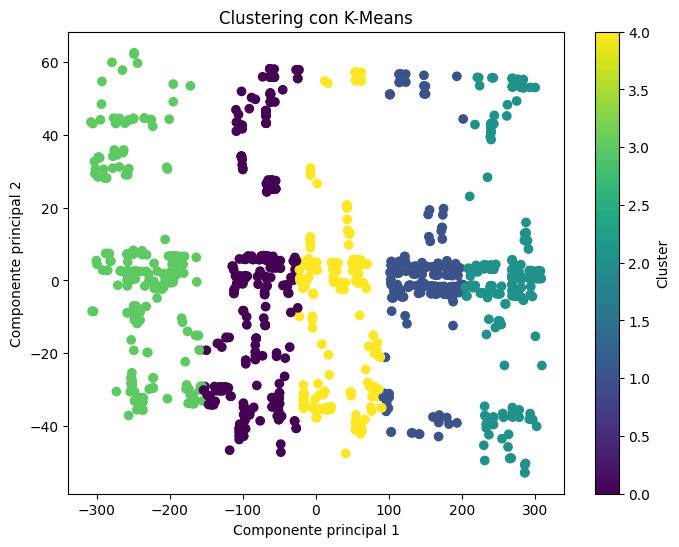

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar características del dataset (sin Price_euros)
X_cluster = df_cleaned.drop('Price_euros', axis=1)

# Establecer el número de clusters (por ejemplo, 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_cluster)

# Asignar las predicciones (clusters) al DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Mostrar los primeros 10 registros con los clusters asignados
print(tabulate(df_cleaned.head(10), headers='keys', tablefmt='grid'))

# Visualización del clustering (solo si es posible reducir la dimensionalidad a 2D o 3D)
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones usando PCA para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title("Clustering con K-Means")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()
